#### 과제 1 
#### 유방암 결과를 분류하는 신경망 모델을 만들고 predict method를 이용하여 목표변수 범주를 예측하라. 
#### 그리고 모델의 정확도와 confusion matrix를 구하라.
#### 데이터 : 유방암.CSV(변수: 31개, 자료 수: 320개)
####  -.목표변수(diagnosis : 양성(108개), 음성(benign, 212개) 

In [1]:
# 데이터 분석 패키지
import pandas as pd
import numpy as np
# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt

#Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 최적모델, 파라미터 탐색
from sklearn.model_selection import train_test_split
#분류 NN
from sklearn.neural_network import MLPClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# 데이터 구성하기 
df_raw = pd.read_csv("D:/data/2/유방암.csv",encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [3]:
df_raw["diagnosis"] = np.where(df_raw["diagnosis"] == "음성", 0, 1)
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [4]:
# 데이터 구성하기 - 결측치 처리
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

<AxesSubplot:>

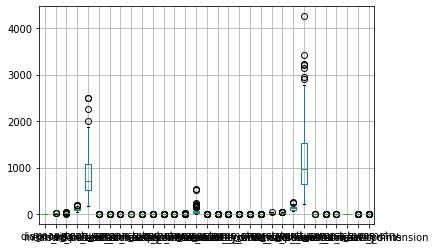

In [5]:
df_raw.boxplot()

<AxesSubplot:>

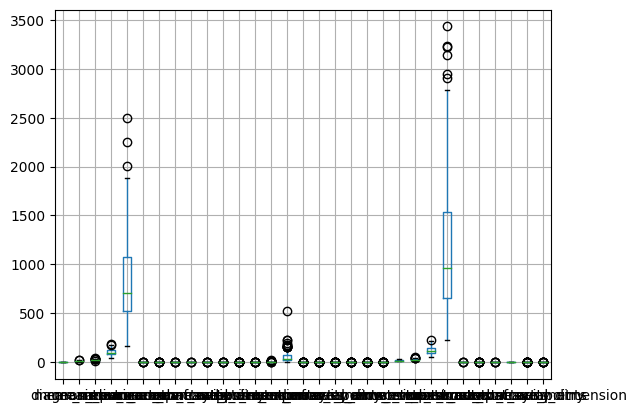

In [6]:
# 이상치 제거
df_raw = df_raw[df_raw["worst_area"] < 4000] 
df_raw.boxplot()

In [7]:
# 설명변수 설정
df_raw_x=df_raw.drop("diagnosis", axis=1, inplace=False) 
# 목표변수 설정
df_raw_y=df_raw["diagnosis"] 
# 데이터 분할 
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state =1234)

# 출력
print(df_train_x.shape)
print(df_train_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(191, 30)
(191,)
(128, 30)
(128,)


In [8]:
nn_uncustomized = MLPClassifier(random_state = 1234)
# hidden_layer_sizes = (100, 100) 변경은닉층 2개. 각 은닉층 노드 100개)
nn_uncustomized.fit(df_train_x, df_train_y)
# train set 정확도
print("Accuracy on traning set: {:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))
# test set 정확도
print("Accuracy on test set: {:.3f}".format(nn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on traning set: 0.634
Accuracy on test set: 0.703


In [9]:
# 현재 생성된 SVC모델의 옵션 확인
nn_uncustomized 

MLPClassifier(random_state=1234)

In [10]:
#train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]
#hidden_layer_sizes: 은닉층(20, 40, 60, 80, 100, 120, 140, 160)
para_hidden = [20 * hidden for hidden in range(1,9)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234) 
#nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden)), random_state = 1234 
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
# 데이터 테이블로 저장    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
# 은닉층별 정확도 테이블
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.911,0.898
1,40,0.911,0.914
2,60,0.634,0.703
3,80,0.634,0.703
4,100,0.634,0.703
5,120,0.885,0.867
6,140,0.927,0.914
7,160,0.832,0.758


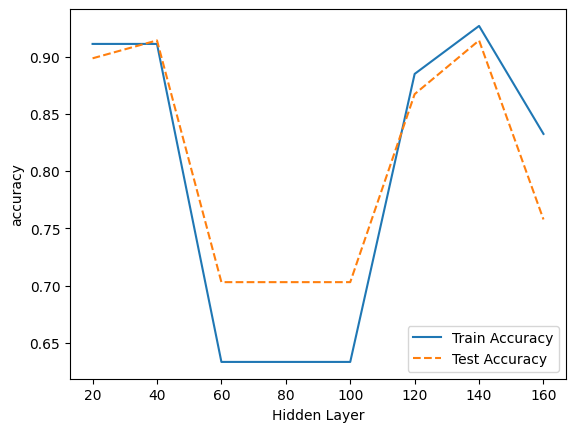

In [12]:
# 모델 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

In [13]:

# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]
# activation 변경
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
# 데이터 테이블로 저장    
df_accuracy_function = pd.DataFrame()
df_accuracy_function["Activation Function"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
# Activaion Function별 정확도 테이블
df_accuracy_function.round(3)
# relu함수 적용시 모델의 정확도가 상대적으로 낮음, 단 scale변환 후 모델 성능 비교 필요

,Activation Function,TrainAccuracy,TestAccuracy
0,logistic,0.937,0.914
1,tanh,0.937,0.922
2,relu,0.634,0.703


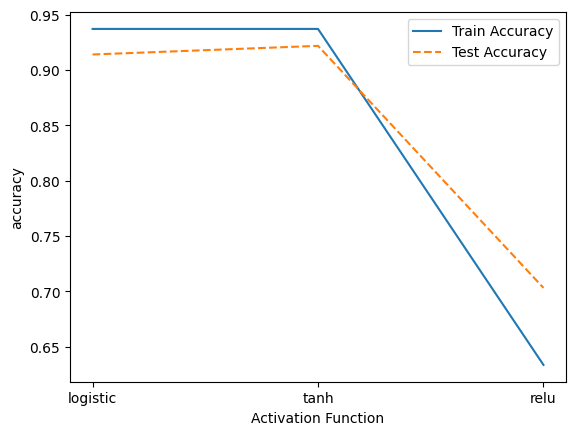

In [15]:
# 모델 정확도 그래프 확인
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Activation Function")
plt.legend()

In [16]:
# 변수명 저장
v_feature_name = df_train_x.columns
# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.149953,-0.876078,-0.157752,-0.225688,-0.742264,-0.475636,-0.548009,-0.625746,-0.994440,-0.395324,...,-0.141016,-1.153338,-0.145315,-0.217604,0.489609,0.141368,-0.089828,-0.297443,0.523224,0.508600
1,-1.321390,-2.560747,-1.339039,-1.169693,-0.238060,-1.150838,-1.147397,-1.201726,-1.770011,0.181207,...,-1.353561,-2.513007,-1.395147,-1.150902,0.253712,-1.043079,-1.157006,-1.479597,-1.387952,-0.508698
2,0.715067,-0.416843,0.622424,0.627335,-0.944508,-0.671957,-0.474086,-0.206038,-0.896129,-1.176566,...,0.554675,-0.141029,0.464843,0.464328,-0.612674,-0.364621,0.008932,0.178883,0.221763,-0.888004
3,-0.204186,-1.299058,-0.249468,-0.303785,-1.288603,-0.657758,-0.788170,-0.833302,-0.655811,-0.836775,...,-0.256964,-1.487466,-0.307078,-0.352044,-1.337522,-0.167023,-0.172207,-0.454227,-0.525399,-0.222599
4,-0.754653,-1.736540,-0.822595,-0.753437,-2.091257,-1.502637,-1.179760,-1.329211,-1.930222,-0.959322,...,-0.956585,-1.930764,-1.005213,-0.886562,-1.781009,-1.105900,-1.091946,-1.365667,-1.072067,-0.899468


In [17]:
# 데이터 분할
df_scaled_train_x,df_scaled_test_x=train_test_split(df_scaled,test_size=0.4,random_state=1234)
print("train data X size:{}".format(df_scaled_train_x.shape))
print("test data X size:{}".format(df_scaled_test_x.shape))

train data X size:(191, 30)
test data X size:(128, 30)


In [18]:
nn_scaled = MLPClassifier(random_state = 1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)
# train set 정확도
print("Accuracy on traning set: {:.3f}".format(nn_scaled.score(df_scaled_train_x, df_train_y)))
# test set 정확도
print("Accuracy on test set: {:.3f}".format(nn_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on traning set: 0.995
Accuracy on test set: 0.969


c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [19]:
# train 및 test 정화도 결과 저장용
train_accuracy = []; test_accuracy =[]
# hidden_layer_sizes: 은닌층 변경(20~240, by30)
para_hidden = [20 * hidden for hidden in range(1,11)]

for v_hidden in para_hidden:
# nn=MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234)
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
# 데이터 레이블로 저장    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy
df_accuracy_hidden.round(3)

c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.979,0.938
1,40,1.000,0.953
2,60,1.000,0.969
3,80,1.000,0.961
4,100,1.000,0.961
5,120,1.000,0.969
6,140,1.000,0.969
7,160,1.000,0.977
8,180,1.000,0.977
9,200,1.000,0.977


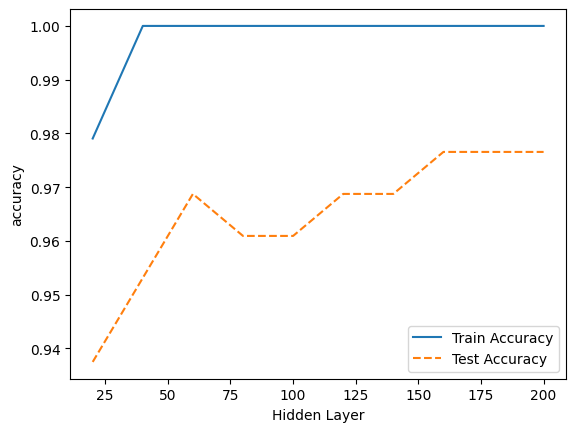

In [20]:
# 은닉층별 정확도 테이블
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
# 모델 정확도 그래프 확인
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()
# 은닉층 지정(임의)
hidden_layer_sizes = 80

In [21]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]
# activation 변경
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (80,80),
                       random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy
# Activation Function별 정확도 테이블
df_accuracy_function.round(3)

c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.995,0.953
1,tanh,1.000,0.953
2,relu,1.000,0.961


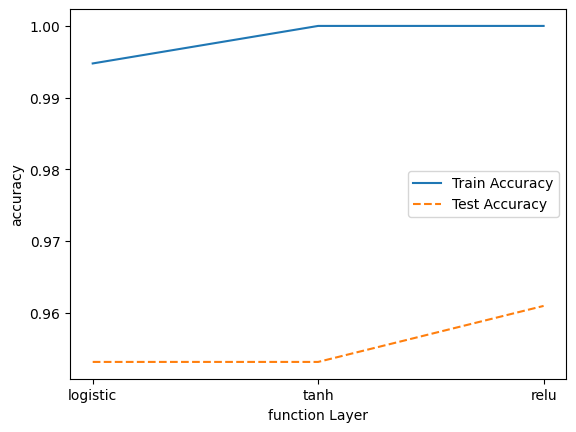

In [22]:
# Activation Function별 정확도 그래프로 확인
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("function Layer")
plt.legend()

In [23]:
# Activation Function 지정(임의)
activation = "relu" 
# 값이 같으므로 임의로 지정
# 스케일 전에는 rulu의 성능이 제일 안좋았지만 스케일 후에는 'relu'함수의 모델이 가장 높은 정확도를 보입니다

In [24]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]
# solver 변경
para_solver = ["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn=MLPClassifier(solver = v_solver, activation = "relu", hidden_layer_sizes = (80,80), random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

c:\dev\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
# Solver별 정확도 테이블
df_accuracy_solver.round(3)

,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.969
1,sgd,0.963,0.914
2,adam,1.000,0.961


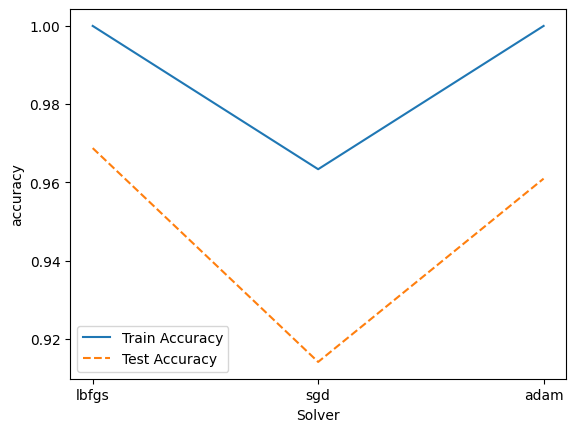

In [26]:
# 정확로 그래프 표현
plt.plot(para_solver, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Solver")
plt.legend()

In [27]:
# Solver 지정(임의)
solver = "adam"
# 'adam' 최적화 모델이 가장 높은 정확도를 보입니다
# 특히 대량 데이터 적용 시 모델의 성능이 우수한 편입니다

In [28]:

# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy =[]
# Mini Batch 변경:
para_batch = [20 * batch for batch in range(1, 10)]

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "adam", 
                       activation = "relu", hidden_layer_sizes = (80,80),
                       random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

In [29]:
# Mini Batch Size별 정확도 테이블
df_accuracy_batch.round(3)

,Mini Batch,TrainAccuracy,TestAccuracy
0,20,1.0,0.977
1,40,1.0,0.977
2,60,1.0,0.969
3,80,1.0,0.969
4,100,1.0,0.961
5,120,1.0,0.961
6,140,1.0,0.961
7,160,1.0,0.969
8,180,1.0,0.969


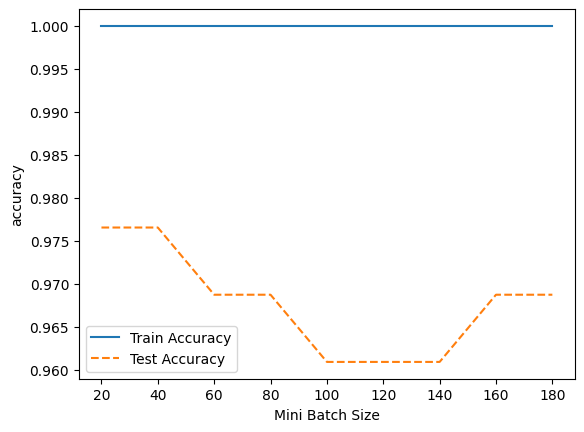

In [30]:
# 정확도 그래프 표현
plt.plot(para_batch, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Mini Batch Size")
plt.legend()

In [31]:
# 최종 모델
nn_final = MLPClassifier(hidden_layer_sizes = (80,80), activation = "relu", 
                         solver = "adam", batch_size =100, random_state = 1234)
nn_final.fit(df_scaled_train_x, df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)
# train 데이터셋 정확도
print("Accuracy on training set: {:.3f}\n".format(nn_final.score(df_scaled_train_x, df_train_y)))
# test 데이터셋 정확도
print("Accuracy on testset: {:.3f}\n".format(nn_final.score(df_scaled_test_x, df_test_y)))
# confusion matrix 정확도
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test_y, y_pred)))
# 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y,y_pred,digits=3))

Accuracy on training set: 1.000

Accuracy on testset: 0.961

Confusion Matrix:
[[85  5]
 [ 0 38]]
              precision    recall  f1-score   support

           0      1.000     0.944     0.971        90
           1      0.884     1.000     0.938        38

    accuracy                          0.961       128
   macro avg      0.942     0.972     0.955       128
weighted avg      0.965     0.961     0.962       128



In [32]:
# 예측값
df_pred = pd.DataFrame({'prediction':nn_final.predict(df_test_x)}) 
df_pred.describe()

,prediction
count,128.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [33]:
# 실제값
df_test_y.describe() 

count    128.000000
mean       0.296875
std        0.458676
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64

#### 과제 2
#### 유방암 데이터를 이용하여 k(이웃 수)가 3~30까지 변화할 때까지 정확도(accuracy)의 변화를 그림으로 나타내고 
#### predict method를 이용하여 예측값을 구해라. 그리고 실제값과의 정확도와 confusion matrix를 구해라.
#### 데이터 : 유방암.CSV(변수: 31개, 자료 수: 320개)
#### -.목표변수(diagnosis : 양성(108개), 음성(benign, 212개) 

In [34]:
# 데이터 분석 패키지
import pandas as pd
import numpy as np
# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt

#Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 최적모델, 파라미터 탐색
from sklearn.model_selection import train_test_split
#분류 NN
from sklearn.neural_network import MLPClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
# 데이터 구성하기 
df_raw = pd.read_csv("D:/data/2/유방암.csv",encoding='euc-kr')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [36]:
df_raw["diagnosis"] = np.where(df_raw["diagnosis"] == "음성", 0, 1)
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


<AxesSubplot:>

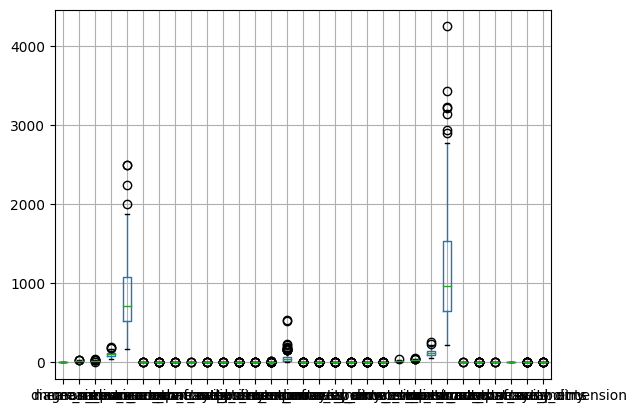

In [37]:
df_raw.boxplot()

<AxesSubplot:>

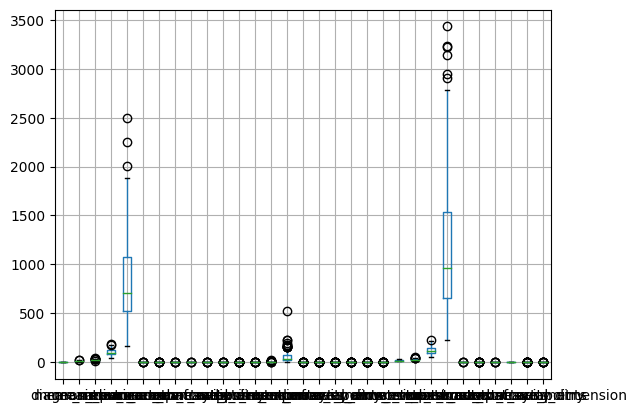

In [38]:
# 이상치 제거
df_raw = df_raw[df_raw["worst_area"] < 4000] 
df_raw.boxplot()

In [39]:
# 설명변수 설정
df_raw_x=df_raw.drop("diagnosis", axis=1, inplace=False) 
# 목표변수 설정
df_raw_y=df_raw["diagnosis"] 
# 데이터 분할 
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state =1234)

# 출력
print(df_train_x.shape)
print(df_train_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(191, 30)
(191,)
(128, 30)
(128,)


In [40]:
#분류 : KNN
from sklearn.neighbors import KNeighborsClassifier

In [41]:
# KNN 모델 생성(default 설정)
knn_uncustomized=KNeighborsClassifier()
knn_uncustomized.fit(df_train_x,df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set : {:.3f}".format(knn_uncustomized.score(df_train_x,df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set : {:.3f}".format(knn_uncustomized.score(df_test_x,df_test_y)))
# 모델 정확도는 train 92.1%, test 92.2로 성능은 유사합니다

Accuracy on training set : 0.921
Accuracy on test set : 0.922


c:\dev\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\dev\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fa

In [42]:
knn_uncustomized

KNeighborsClassifier()

In [43]:
# train 및 test 정확도 결과 저장
train_accuracy = []
test_accuracy = []

# 최대 이웃 수: 1~15
para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors :
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))

# 데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["Train Accuracy"] = train_accuracy
df_accuracy_neighbors["Test Accuracy"] = test_accuracy
df_accuracy_neighbors.round(3)

c:\dev\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\dev\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fa

,Neighbors,Train Accuracy,Test Accuracy
0,1,1.000,0.898
1,2,0.942,0.914
2,3,0.927,0.898
3,4,0.927,0.906
4,5,0.921,0.922
5,6,0.921,0.898
6,7,0.927,0.898
7,8,0.921,0.906
8,9,0.927,0.898
9,10,0.916,0.906


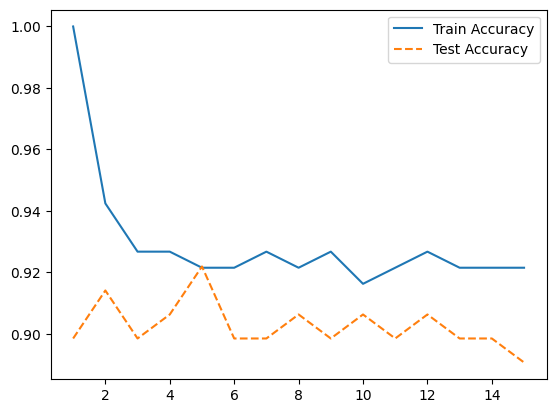

In [44]:
# 모델 정확도 그래프 확인
plt.plot(para_n_neighbors, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()


In [45]:
# 임의로 성능차이를 고려하여 이웃 수 5으로 지정
n_neighbors =5

In [46]:
#train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

#이웃 수
para_n_neighbors = [i for i in range(1,11)] * 2

# 가중치(uniform, distance)
para_weights = (["uniform"]) * 10 + (["distance"] * 10)

#zip(list1,list2,...)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
#1번 loop: n_neighbors = para_n_neighbors[0], weights = para_weights[0]
#2번 loop: n_neighbors = para_n_neighbors[1], weights = para_weights[1]

for (v_n_neighbors,v_weights) in zip(para_n_neighbors, para_weights) :
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))

# 데이터 테이블로 저장
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["Train Accuracy"] = train_accuracy
df_accuracy_weights["Test Accuracy"] = test_accuracy
df_accuracy_weights.round(3)

c:\dev\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\dev\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fa

,Neighbors,Weights,Train Accuracy,Test Accuracy
0,1,uniform,1.000,0.898
1,2,uniform,0.942,0.914
2,3,uniform,0.927,0.898
3,4,uniform,0.927,0.906
4,5,uniform,0.921,0.922
5,6,uniform,0.921,0.898
6,7,uniform,0.927,0.898
7,8,uniform,0.921,0.906
8,9,uniform,0.927,0.898
9,10,uniform,0.916,0.906


In [47]:
#그림을 그리기 위해 데이터의 형태를 변환
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = "Neighbors",columns = "Weights",
                                                      values = ["Train Accuracy","Test Accuracy"])

df_accuracy_weights_pivot

Train Accuracy           Test Accuracy          
Weights         distance   uniform      distance   uniform
Neighbors                                                 
1                    1.0  1.000000      0.898438  0.898438
2                    1.0  0.942408      0.898438  0.914062
3                    1.0  0.926702      0.898438  0.898438
4                    1.0  0.926702      0.890625  0.906250
5                    1.0  0.921466      0.921875  0.921875
6                    1.0  0.921466      0.921875  0.898438
7                    1.0  0.926702      0.898438  0.898438
8                    1.0  0.921466      0.914062  0.906250
9                    1.0  0.926702      0.906250  0.898438
10                   1.0  0.916230      0.914062  0.906250

In [48]:
# pivot을 이용할 경우, columns와 values이 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + "_" + level1
df_accuracy_weights_pivot.head()

,Train Accuracy_distance,Train Accuracy_uniform,Test Accuracy_distance,Test Accuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.898438,0.898438
2,1.0,0.942408,0.898438,0.914062
3,1.0,0.926702,0.898438,0.898438
4,1.0,0.926702,0.890625,0.906250
5,1.0,0.921466,0.921875,0.921875


In [49]:
import seaborn as sns

<AxesSubplot:xlabel='Neighbors'>

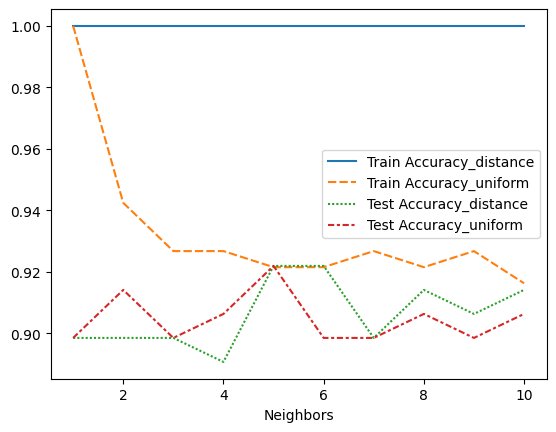

In [50]:
# 그래프 생성, 변수별 linestyle 구분
sns.lineplot(data = df_accuracy_weights_pivot)

In [51]:
# 가중치 distance일 떄 모델의 정확도는 1 (과대적합)

In [52]:
# 과대적합 방지를 위해 uniform으로 가중치 지정
# weights = uniform
weights = "uniform"

In [53]:
# train 및 test 정확도 결과 저장
train_accuracy = []; test_accuracy = []
# 이웃 수
para_n_neighbors = [i for i in range(1,11)] * 3
# 거리 계산 방법 (minkowski, euclidean, manhattan)
para_metric = ["minkowski"] * 10 + ["euclidean"] * 10 + ["manhattan"] * 10

for (v_n_neighbors,v_metric) in zip(para_n_neighbors, para_metric) :
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, metric = v_metric,weights = "uniform")
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))

# 데이터 테이블로 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["Train Accuracy"] = train_accuracy
df_accuracy_metric["Test Accuracy"] = test_accuracy
df_accuracy_metric.round(3)

c:\dev\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\dev\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fa

,Neighbors,Metric,Train Accuracy,Test Accuracy
0,1,minkowski,1.000,0.898
1,2,minkowski,0.942,0.914
2,3,minkowski,0.927,0.898
3,4,minkowski,0.927,0.906
4,5,minkowski,0.921,0.922
5,6,minkowski,0.921,0.898
6,7,minkowski,0.927,0.898
7,8,minkowski,0.921,0.906
8,9,minkowski,0.927,0.898
9,10,minkowski,0.916,0.906


<AxesSubplot:xlabel='Neighbors'>

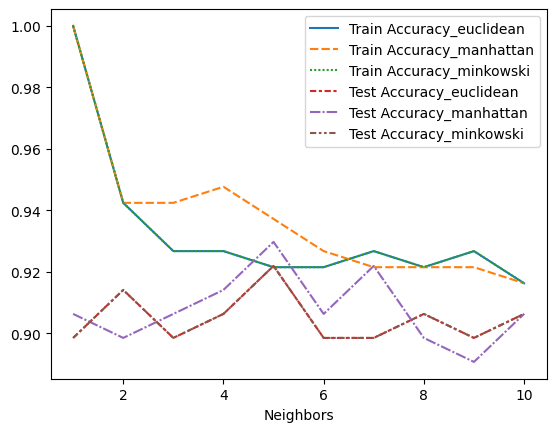

In [54]:
# 정확도를 그래프로 그림
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = "Neighbors",columns = "Metric",
                                                      values = ["Train Accuracy","Test Accuracy"])

level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1
sns.lineplot(data = df_accuracy_metric_pivot)

In [55]:
# 최종 모델
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, weights = "uniform", metric = "manhattan")
knn_model.fit(df_train_x,df_train_y)
# 평가
y_pred = knn_model.predict(df_test_x)

# train 데이터 셋 정확도
print("train data accuracy:",knn_model.score(df_train_x,df_train_y))
# test 데이터 셋 정확도
print("test data accuracy:",knn_model.score(df_test_x,df_test_y))
# confusion matrix
print("Confusion matrix:\n",confusion_matrix(df_test_y,y_pred))
# 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y,y_pred,digits=3))

train data accuracy: 0.93717277486911
test data accuracy: 0.9296875
Confusion matrix:
 [[83  7]
 [ 2 36]]
              precision    recall  f1-score   support

           0      0.976     0.922     0.949        90
           1      0.837     0.947     0.889        38

    accuracy                          0.930       128
   macro avg      0.907     0.935     0.919       128
weighted avg      0.935     0.930     0.931       128



c:\dev\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\dev\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or Fa